In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
## Trasforming df into cufflinks for iPlot
import cufflinks
cufflinks.go_offline(connected= True)
init_notebook_mode(connected= True)

In [2]:
covid_confirmed = pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/time_series_covid19_confirmed_global.csv')
covid_deaths = pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/time_series_covid19_deaths_global.csv')
covid_recovered = pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/time_series_covid19_recovered_global.csv')

In [3]:
covid_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,174,187,208,208,208,208,208,220,235,235
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,25,25,34,34,51,56,65,70,85,106
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,8,8,8,11,11,11,11,11,11,11
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,379,461,522,612,612,661,729,801,907,1118


In [4]:
covid_confirmed.rename({'Province/State':'State', 'Country/Region':'Country'}, axis=1, inplace=True)
covid_deaths.rename({'Province/State':'State', 'Country/Region':'Country'}, axis=1, inplace=True)
covid_recovered.rename({'Province/State':'State', 'Country/Region':'Country'}, axis=1, inplace=True)

In [5]:
covid_confirmed.head(15)

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,5208,5371,5611,5776,6034,6278,6563,6879,7134,7479
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,2782,2884,3029,3175,3313,3392,3538,3718,3860,4044
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3044,3047,3051,3053,3053,3053,3059,3063,3071,3074


In [6]:
covid_country = covid_confirmed.drop(['State', 'Lat', 'Long'], axis=1)

In [7]:
covid_country = covid_country.groupby(by='Country').sum()

In [8]:
covid_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
Albania,0,0,0,0,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
Algeria,0,0,0,0,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
Andorra,0,0,0,0,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
Angola,0,0,0,0,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,374,375,375,375,375,375,375,375,375,375
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,25,25,34,34,51,56,65,70,85,106


In [9]:
covid_country.iloc[:, -1].sum()

4542347

In [10]:
covid_country.sort_values(by =  covid_country.columns[-1], ascending=False).head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,1229331,1257023,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824
Russia,0,0,0,0,0,0,0,0,0,2,...,165929,177160,187859,198676,209688,221344,232243,242271,252245,262843
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,202359,207977,212629,216525,220449,224332,227741,230985,234440,238004
Spain,0,0,0,0,0,0,0,0,0,0,...,220325,221447,222857,223578,224350,227436,228030,228691,229540,230183
Italy,0,0,0,0,0,0,0,0,0,2,...,214457,215858,217185,218268,219070,219814,221216,222104,223096,223885
Brazil,0,0,0,0,0,0,0,0,0,0,...,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291
France,0,0,2,3,3,3,4,5,5,5,...,174224,174918,176202,176782,177094,177547,178349,178184,178994,179630
Germany,0,0,0,0,0,1,4,4,4,5,...,168162,169430,170588,171324,171879,172576,173171,174098,174478,175233
Turkey,0,0,0,0,0,0,0,0,0,0,...,131744,133721,135569,137115,138657,139771,141475,143114,144749,146457


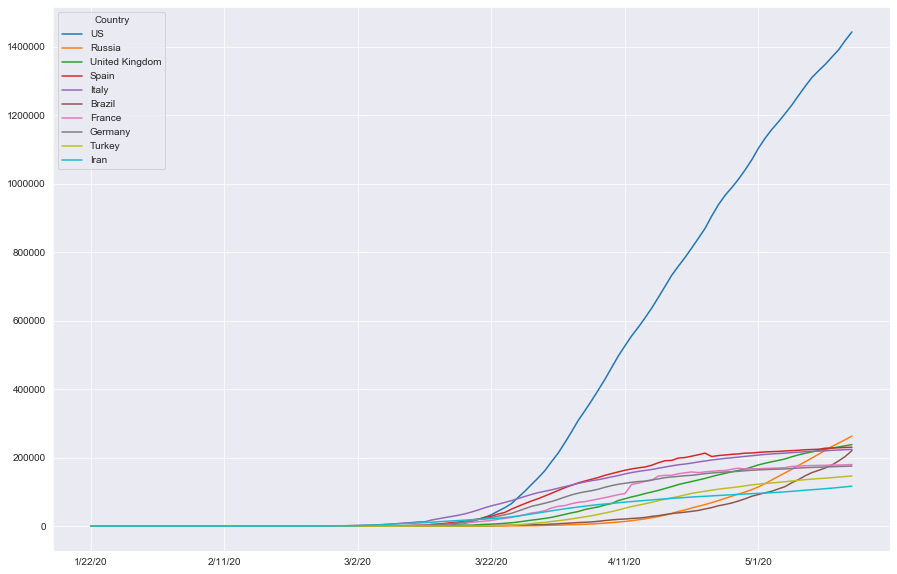

In [11]:
sns.set_style('darkgrid')
covid_country.sort_values(by =  covid_country.columns[-1], ascending=False).head(10).transpose().plot(figsize=(15,10))

In [12]:
covid_country.sort_values(by =  covid_country.columns[-1], ascending=False).head(10).transpose().iplot()

In [13]:
covid_country.loc['India'].iplot(title = "Time Series Covid19 Confirmed Cases Visulaization for Republic  of India")

In [14]:
covid_country.loc['India'].diff().iplot(title = "Daily Increase in Number Of Cases in India") 

In [15]:
import folium 

In [16]:
covid_confirmed

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,174,187,208,208,208,208,208,220,235,235
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,25,25,34,34,51,56,65,70,85,106
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,8,8,8,11,11,11,11,11,11,11
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,379,461,522,612,612,661,729,801,907,1118


In [17]:
# location - [latitude, longitude], 
world_map = folium.Map(location=[10,0], zoom_start=2, max_zoom=8, min_zoom=1, width='100%', tiles = "CartoDB dark_matter")
for i in range(0, len(covid_confirmed)):
    folium.Circle(location=[ covid_confirmed.iloc[i]['Lat'], covid_confirmed.iloc[i]['Long']],
                 radius= 10,
                 color= 'red',
                 fill = True).add_to(world_map)

world_map